In [1]:
import numpy as np # --- Process Data ---

def readvaisala (fname):

    data_file = open(fname)

    lats, lons = [], []
    magnitudes = []
    timestrings = []
    datestrings = []
    for index, line in enumerate(data_file.readlines()):
        if index > 0:
            datestrings.append((line.split(' ')[0]))
            timestrings.append((line.split(' ')[1]))
            lats.append(float(line.split(' ')[2]))
            lons.append(float(line.split(' ')[3]))
            magnitudes.append(float(line.split(' ')[4]))
    return datestrings, timestrings, lats, lons, magnitudes
    #print ("lats" , lats)
    #print ("lons" , lons)
    #print ("timestrings"  , timestrings)

   



 


def get_marker_color(magnitude):
    if np.abs(magnitude) < 200.0:
        return ('go')
    elif np.abs(magnitude) < 400.0:         
        return ('yo')     
    else:         
        return ('ro') 
    


        
%matplotlib inline

def plotvaisala (datestrings, timestrings, lats, lons, magnitudes):
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    import numpy as np
    
    minlat= (min (lats))
    maxlat= (max (lats))
    minlon= (min (lons))
    maxlon= (max (lons))

    minmag=(min (magnitudes))
    maxmag=(max (magnitudes))     
    # --- Build Map ---


    map =  Basemap(projection='merc',llcrnrlat=minlat,urcrnrlat=maxlat,\
                llcrnrlon=minlon,urcrnrlon=maxlon,lat_ts=20,resolution='i')
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'gray')
    map.drawmapboundary()
    map.drawmeridians(np.arange(0, 360, 30))
    map.drawparallels(np.arange(-90, 90, 30))

    min_marker_size = .03
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        map.plot(x, y, marker_string, markersize=msize)


    plt.title("Vaisala GLD 360 data for southern Europe "+ datestrings[0].strftime('%d %B %Y'))
    tag = datestrings[0].strftime('%Y%m%d')
    plt.savefig('vaisala'+tag+'.png')

    plt.show()

    
from os.path import expanduser
home = expanduser("~")
path='/Users/garmu/Downloads/'
tag='20160302'
fname=path+'total_'+tag+'.txt' 

#datestrings, timestrings, lats, lons, magnitudes=readvaisala(fname)
#plotvaisala (datestrings, timestrings, lats, lons, magnitudes)

In [2]:
def read_postgres_vaisala (mydate):
    tbeg=mydate+' 00:00:00'
    tend=mydate+' 23:59:59'
    import psycopg2
    import sys
    import numpy as np


    con = None

    try:

        con = psycopg2.connect(host='gld.spacecenter.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        cur = con.cursor()
        cur.execute("SELECT * FROM lightnings LIMIT 0")
        colnames = [desc[0] for desc in cur.description]
        cur.execute("SELECT * FROM lightnings  WHERE ltime   BETWEEN '"+tbeg+"' AND '"+tend+"' LIMIT 24300 ;")          
        data =   (cur.fetchall())

        #for row in rows:
        #    print (row)

    except :
        print ('Error '     )
        sys.exit(1)


    finally:

        if con:
            con.close()


    from numpy import array
    nparr = array( data )

    id=nparr[:,0]
    datestrings=nparr[:,1]
    timestrings=nparr[:,2]
    magnitudes=nparr[:,3]
    lats=nparr[:,4]
    lons=nparr[:,5]
    
    return datestrings, timestrings, lats, lons, magnitudes



(17770,)
('Time to fetch', datetime.timedelta(0, 0, 759273))


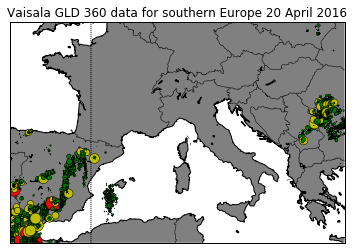

('Time to plot', datetime.timedelta(0, 39, 82556))


In [3]:
fname=0


from datetime import datetime
a=datetime.utcnow()



mydate='2016-04-20'
a=datetime.utcnow()

datestrings, timestrings, lats, lons, magnitudes=read_postgres_vaisala(mydate)

b=datetime.utcnow()

print (lons.shape)
print ("Time to fetch", b-a)

plotvaisala (datestrings, timestrings, lats, lons, magnitudes)
c=datetime.utcnow()

print ("Time to plot", c-b)


(5411,)
('Time to fetch', datetime.timedelta(0, 0, 175618))


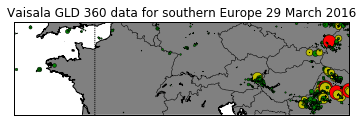

('Time to plot', datetime.timedelta(0, 13, 781541))
(790,)
('Time to fetch', datetime.timedelta(0, 0, 20610))


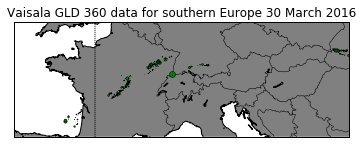

('Time to plot', datetime.timedelta(0, 4, 155978))
(3141,)
('Time to fetch', datetime.timedelta(0, 0, 50399))


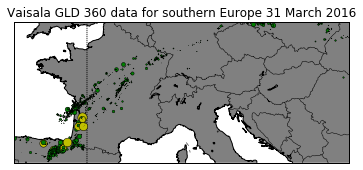

('Time to plot', datetime.timedelta(0, 8, 373759))
(489,)
('Time to fetch', datetime.timedelta(0, 0, 16747))


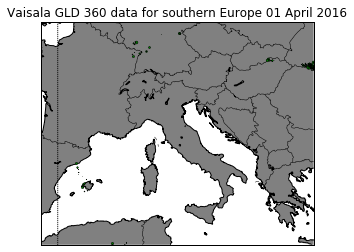

('Time to plot', datetime.timedelta(0, 3, 801185))
(2966,)
('Time to fetch', datetime.timedelta(0, 0, 75635))


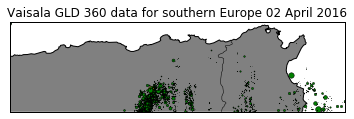

('Time to plot', datetime.timedelta(0, 7, 534143))
(6837,)
('Time to fetch', datetime.timedelta(0, 0, 99042))


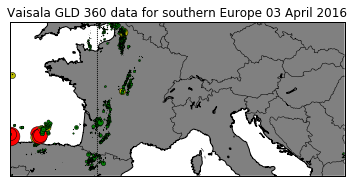

('Time to plot', datetime.timedelta(0, 16, 24613))


In [4]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2016, 3, 29)
end_date = date(2016, 4, 4)
for single_date in daterange(start_date, end_date):
    mydate=(single_date.strftime("%Y-%m-%d"))
    a=datetime.utcnow()

    datestrings, timestrings, lats, lons, magnitudes=read_postgres_vaisala(mydate)

    b=datetime.utcnow()

    print (lons.shape)
    print ("Time to fetch", b-a)

    plotvaisala (datestrings, timestrings, lats, lons, magnitudes)
    c=datetime.utcnow()

    print ("Time to plot", c-b)

In [ ]:
print (min(lats))